<a href="https://colab.research.google.com/github/harshita042/PRML-CSL2050/blob/main/LogReg_Lab4.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In this lab, you will implement logistic regression from scratch, understand evaluation metrics through Precision-Recall and ROC curves, and extend the algorithm to handle multi-class classification problems.


# Logistic Regression: Mathematical Foundations

Logistic regression is a supervised learning algorithm used for **binary classification**. It predicts the probability that a given input belongs to a particular class (typically labeled 0 or 1).

## 1. Sigmoid Function

The core of logistic regression is the **sigmoid function**, which maps any real-valued number into the range (0, 1), making it ideal for probability estimation:

$$
\sigma(z) = \frac{1}{1 + e^{-z}}
$$

Here, $z$ is the linear combination of input features:

$$
z = \mathbf{w}^T \mathbf{x} + b
$$

- $\mathbf{x}$: Feature vector  
- $\mathbf{w}$: Weight vector  
- $b$: Bias term  

The output $\hat{y} = \sigma(z)$ represents the predicted probability that the input belongs to class 1.

---

## 2. Cost Function (Log Loss)

To train the model, we minimize the **log loss** (also called binary cross-entropy), which penalizes incorrect predictions more heavily as they become more confident:

$$
J(\mathbf{w}, b) = -\frac{1}{m} \sum_{i=1}^{m} \left[ y^{(i)} \log(\hat{y}^{(i)}) + (1 - y^{(i)}) \log(1 - \hat{y}^{(i)}) \right]
$$

- $m$: Number of training examples  
- $y^{(i)}$: True label for the $i$-th example  
- $\hat{y}^{(i)}$: Predicted probability for the $i$-th example  


## 2.1 Basic Logistic Regression Implementation In this section, we will implement **logistic regression** for binary classification.

**Generating Synthetic Data**

Dataset shape: (1000, 2)
Number of samples: 1000
Number of features: 2
Class distribution: Class 0: 501, Class 1: 499


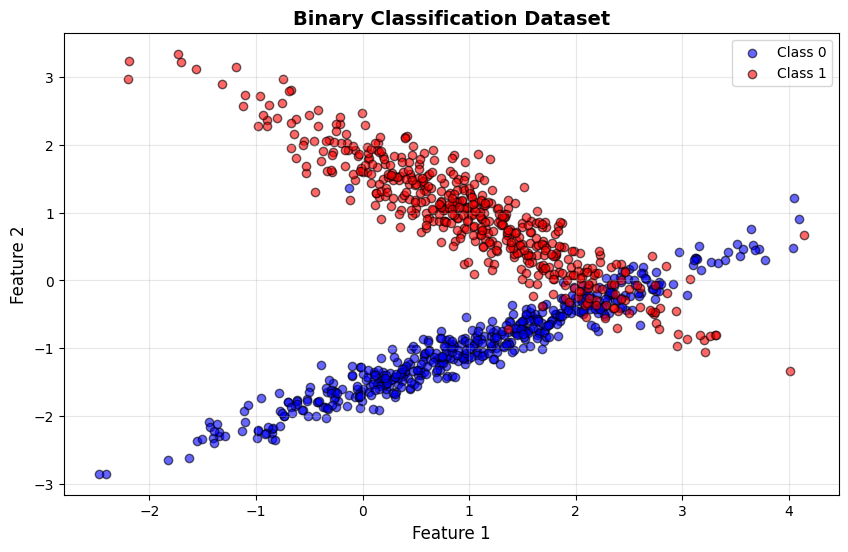

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.datasets import make_classification
from sklearn.model_selection import train_test_split, GridSearchCV

from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report

# Generate synthetic binary classification dataset
'''X, y = make_classification(
    n_samples=1000,
    n_features=2,  # Using 2 features for easy visualization
    n_informative=2,
    n_redundant=0,
    n_clusters_per_class=1,
    random_state=42
)'''

print(f"Dataset shape: {X.shape}")
print(f"Number of samples: {X.shape[0]}")
print(f"Number of features: {X.shape[1]}")
print(f"Class distribution: Class 0: {np.sum(y==0)}, Class 1: {np.sum(y==1)}")

# Visualize the dataset
plt.figure(figsize=(10, 6))
plt.scatter(X[y==0][:, 0], X[y==0][:, 1], c='blue', label='Class 0', alpha=0.6, edgecolors='k')
plt.scatter(X[y==1][:, 0], X[y==1][:, 1], c='red', label='Class 1', alpha=0.6, edgecolors='k')
plt.xlabel('Feature 1', fontsize=12)
plt.ylabel('Feature 2', fontsize=12)
plt.title('Binary Classification Dataset', fontsize=14, fontweight='bold')
plt.legend()
plt.grid(True, alpha=0.3)
plt.show()



**Train - Test - Split**

In [2]:
# Split into train and test sets
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.3, random_state=42
)

print(f"\nTraining set size: {X_train.shape[0]}")
print(f"Test set size: {X_test.shape[0]}")


Training set size: 700
Test set size: 300


In [3]:
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

**Logistic Regression**

In [4]:
log_reg = LogisticRegression(solver='liblinear', max_iter=1000)

In [5]:
param_grid = {
    'C': [0.01, 0.1, 1, 10, 100],
    'penalty': ['l1', 'l2']
}

In [6]:
grid_search = GridSearchCV(
    estimator=log_reg,
    param_grid=param_grid,
    cv=5,                 # 5-Fold Cross-Validation
    scoring='accuracy',   # Metric to optimize
    n_jobs=-1,            # Use all available CPU cores
    verbose=1
)

In [7]:
print("Starting Hyperparameter Tuning...")
grid_search.fit(X_train_scaled, y_train)

Starting Hyperparameter Tuning...
Fitting 5 folds for each of 10 candidates, totalling 50 fits


GridSearchCV(cv=5,
             estimator=LogisticRegression(max_iter=1000, solver='liblinear'),
             n_jobs=-1,
             param_grid={'C': [0.01, 0.1, 1, 10, 100], 'penalty': ['l1', 'l2']},
             scoring='accuracy', verbose=1)

In [8]:
best_params = grid_search.best_params_
best_score = grid_search.best_score_

In [9]:
print(f"\nBest Parameters found: {best_params}")
print(f"Best Cross-Validation Accuracy: {best_score:.4f}")


Best Parameters found: {'C': 10, 'penalty': 'l1'}
Best Cross-Validation Accuracy: 0.9186


In [10]:
y_pred = grid_search.predict(X_test_scaled)

In [11]:
test_accuracy = accuracy_score(y_test, y_pred)
print(f"Test Set Accuracy: {test_accuracy:.4f}")
print("\nClassification Report:\n")
print(classification_report(y_test, y_pred))

Test Set Accuracy: 0.8833

Classification Report:

              precision    recall  f1-score   support

           0       0.85      0.93      0.89       147
           1       0.93      0.84      0.88       153

    accuracy                           0.88       300
   macro avg       0.89      0.88      0.88       300
weighted avg       0.89      0.88      0.88       300



In [12]:
conf_matrix = confusion_matrix(y_test, y_pred)

In [13]:
classes = ['Class 0', 'Class 1']

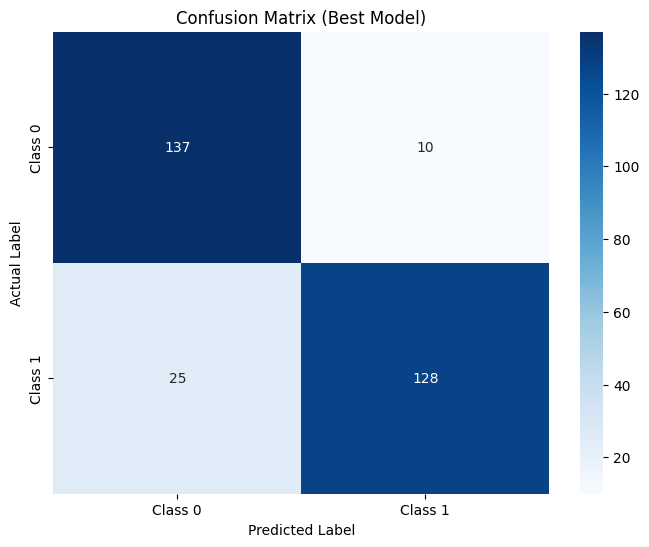

In [14]:
plt.figure(figsize=(8, 6))
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues',
            xticklabels=classes,
            yticklabels=classes)
plt.title('Confusion Matrix (Best Model)')
plt.ylabel('Actual Label')
plt.xlabel('Predicted Label')
plt.show()

**Decision Boundary**

In [15]:
#Define the Plotting Function
def plot_decision_boundary(X, y, model):
    # Set min and max values and give it some padding
    x_min, x_max = X[:, 0].min() - 1, X[:, 0].max() + 1
    y_min, y_max = X[:, 1].min() - 1, X[:, 1].max() + 1

    # Generate a grid of points with distance h between them
    h = 0.02
    xx, yy = np.meshgrid(np.arange(x_min, x_max, h), np.arange(y_min, y_max, h))

    Z = model.predict_proba(np.c_[xx.ravel(), yy.ravel()])[:, 1]
    Z = Z.reshape(xx.shape)

    # Plot the contour and training examples
    plt.figure(figsize=(10, 8))

    # Contour for probabilities
    plt.contourf(xx, yy, Z, levels=20, cmap='RdBu', alpha=0.8)
    plt.colorbar(label='Probability of Class 1')

    # Decision Boundary Line (where prob=0.5)
    plt.contour(xx, yy, Z, levels=[0.5], colors='black', linewidths=2)

    # Plot the actual data points
    plt.scatter(X[y == 0][:, 0], X[y == 0][:, 1], c='blue', label='Class 0', edgecolors='k', s=50)
    plt.scatter(X[y == 1][:, 0], X[y == 1][:, 1], c='red', label='Class 1', edgecolors='k', s=50)

    plt.title('Logistic Regression Decision Boundary', fontsize=15)
    plt.xlabel('Feature 1')
    plt.ylabel('Feature 2')
    plt.legend()
    plt.show()

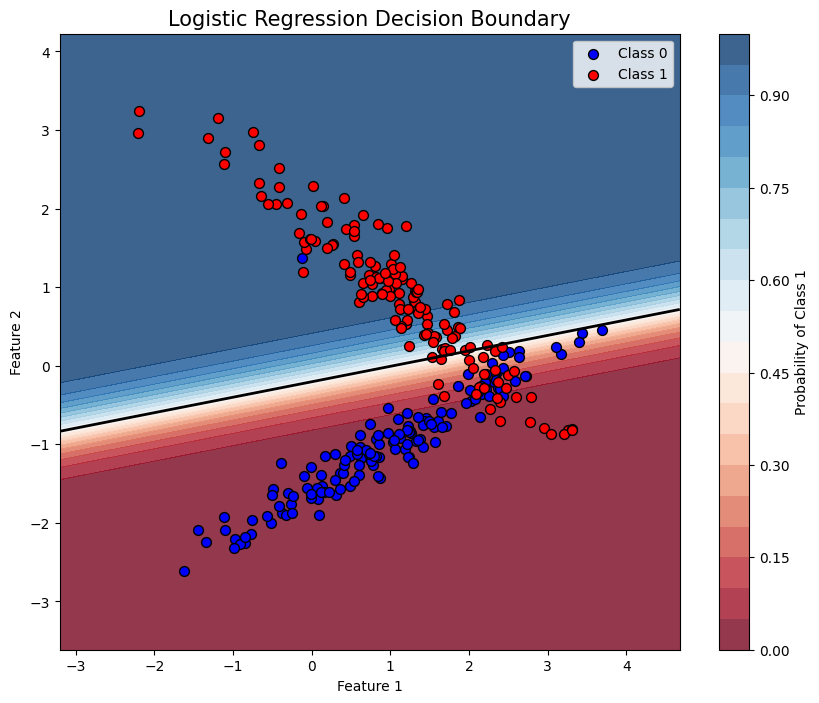

In [16]:
plot_decision_boundary(X_test, y_test, grid_search.best_estimator_)

**ROC Curve**

<Figure size 800x600 with 0 Axes>

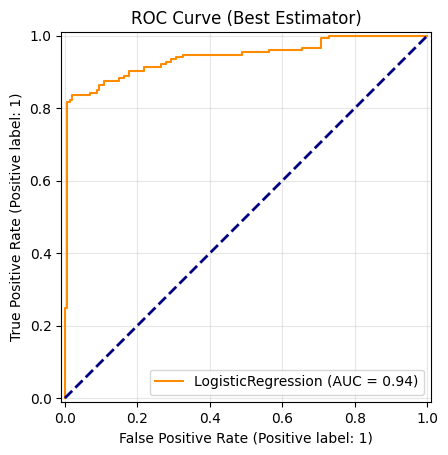

In [17]:
from sklearn.metrics import RocCurveDisplay

# Use the best model found by your Grid Search for your model
# Since we have not fitted the logistic regressor directly.
best_model = grid_search.best_estimator_

plt.figure(figsize=(8, 6))
RocCurveDisplay.from_estimator(best_model, X_test, y_test, color='darkorange')

plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.title('ROC Curve (Best Estimator)')
plt.grid(alpha=0.3)
plt.show()

**Precision-Recall Curve**

<Figure size 800x600 with 0 Axes>

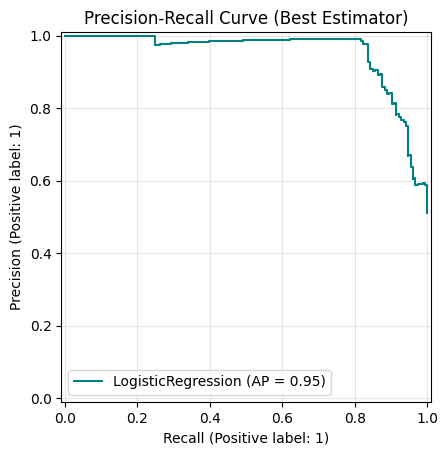

In [18]:
from sklearn.metrics import PrecisionRecallDisplay

plt.figure(figsize=(8, 6))
PrecisionRecallDisplay.from_estimator(best_model, X_test, y_test, color='teal')

plt.title('Precision-Recall Curve (Best Estimator)')
plt.grid(alpha=0.3)
plt.show()

# Lab Task

<h3>1. Use the breast cancer dataset in scikit learn library and implement logistic regression over it.

<pre>
<font color="green">from sklearn.datasets import load_breast_cancer
data = load_breast_cancer()</font>
</pre>
<h3>2. Visualize the data and perform exploratory data analysis (EDA).
<h3>3. Try to implement the same algo but with different solver for logistic regression.
<pre>‘lbfgs’, ‘liblinear’, ‘newton-cg’, ‘newton-cholesky’, ‘sag’, ‘saga’</pre>
<h3>4. Using PCA as a black box, can you reduce the dimension of your dataset to 2 or 3 for visualization purpose.
<pre>
<font color='green'>from sklearn.decomposition import PCA
pca = PCA(n_components=2)
X_test_pca = pca.fit_transform(X_test_scaled)
df_viz = pd.DataFrame(data=X_test_pca, columns=['PC1', 'PC2'])</font>
</pre>

In [19]:
from sklearn.datasets import load_breast_cancer
data = load_breast_cancer()

In [20]:
data

{'data': array([[1.799e+01, 1.038e+01, 1.228e+02, ..., 2.654e-01, 4.601e-01,
         1.189e-01],
        [2.057e+01, 1.777e+01, 1.329e+02, ..., 1.860e-01, 2.750e-01,
         8.902e-02],
        [1.969e+01, 2.125e+01, 1.300e+02, ..., 2.430e-01, 3.613e-01,
         8.758e-02],
        ...,
        [1.660e+01, 2.808e+01, 1.083e+02, ..., 1.418e-01, 2.218e-01,
         7.820e-02],
        [2.060e+01, 2.933e+01, 1.401e+02, ..., 2.650e-01, 4.087e-01,
         1.240e-01],
        [7.760e+00, 2.454e+01, 4.792e+01, ..., 0.000e+00, 2.871e-01,
         7.039e-02]]),
 'target': array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1,
        0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0,
        0, 0, 1, 0, 1, 1, 1, 1, 1, 0, 0, 1, 0, 0, 1, 1, 1, 1, 0, 1, 0, 0,
        1, 1, 1, 1, 0, 1, 0, 0, 1, 0, 1, 0, 0, 1, 1, 1, 0, 0, 1, 0, 0, 0,
        1, 1, 1, 0, 1, 1, 0, 0, 1, 1, 1, 0, 0, 1, 1, 1, 1, 0, 1, 1, 0, 1,
        1, 1, 1, 1, 1, 1, 1, 0, 0, 0, 1, 0, 0, 1, 1, 1, 0